In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, RocCurveDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.utils import resample

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

from scipy.stats import uniform, randint


In [2]:
diabetes = pd.read_csv('data/diabetes_binary_health_indicators_BRFSS2015.csv')

In [3]:
diabetes.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
# Summary statistics
diabetes.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


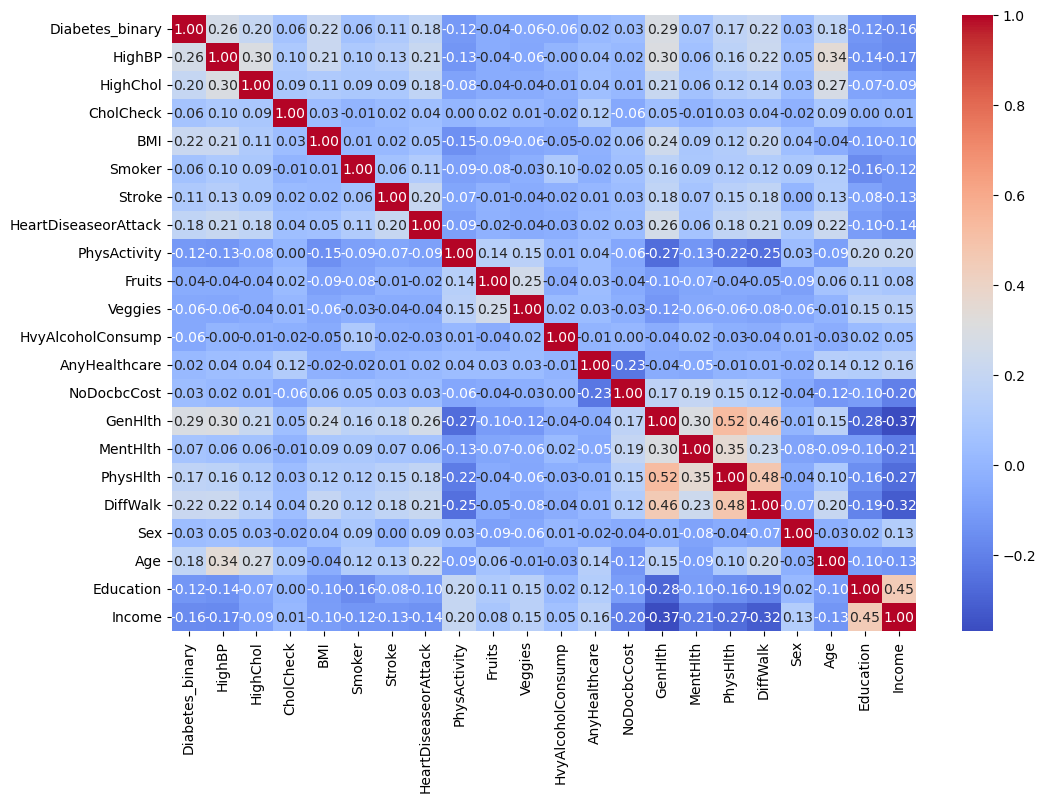

In [6]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(diabetes.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

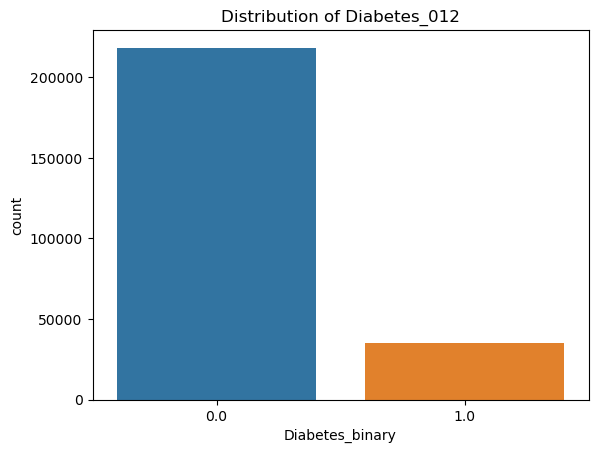

In [7]:
# Distribution of the target variable
sns.countplot(x='Diabetes_binary', data=diabetes)
plt.title('Distribution of Diabetes_012')
plt.show()

### The data is not evenly distributed! There are many more people without diabetes than with diabetes in this dataset.

In [8]:
# Separate majority and minority classes
majority = diabetes[diabetes['Diabetes_binary'] == 0]
minority = diabetes[diabetes['Diabetes_binary'] == 1]

# Upsample minority class
minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=42)

# Combine majority class with upsampled minority class
upsampled = pd.concat([majority, minority_upsampled])

# Split the data into features and target
X_upsampled = upsampled.drop('Diabetes_binary', axis=1)
y_upsampled = upsampled['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size=0.2, random_state=42)

## Logistic Regression 

In [9]:


# Logistic Regression hyperparameter tuning
lr_params = {
    'logisticregression__C': [0.01, 0.1, 1.0, 10.0],
    'logisticregression__penalty': ['l2']
}

lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logisticregression', LogisticRegression(max_iter=10000, random_state=42, class_weight='balanced'))
])

lr_grid_search = GridSearchCV(lr_pipeline, param_grid=lr_params, cv=5, n_jobs=-1, scoring='recall')
lr_grid_search.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", lr_grid_search.best_params_)

# Cross-validation scores for Logistic Regression
cv_scores = cross_val_score(lr_grid_search.best_estimator_, X_train, y_train, cv=5, scoring='recall')
print(f"Cross-validation recall scores: {cv_scores}")
print(f"Mean recall score: {np.mean(cv_scores)}")

# Evaluate the best Logistic Regression model
lr_best = lr_grid_search.best_estimator_
y_pred_lr = lr_best.predict(X_test)

# Classification report for Logistic Regression
print("Logistic Regression Model Evaluation:")
print(classification_report(y_test, y_pred_lr))


Best parameters for Logistic Regression: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}
Cross-validation recall scores: [0.77006955 0.76643485 0.7631722  0.7642665  0.76403079]
Mean recall score: 0.7655947782461934
Logistic Regression Model Evaluation:
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74     43706
         1.0       0.74      0.76      0.75     43628

    accuracy                           0.75     87334
   macro avg       0.75      0.75      0.75     87334
weighted avg       0.75      0.75      0.75     87334



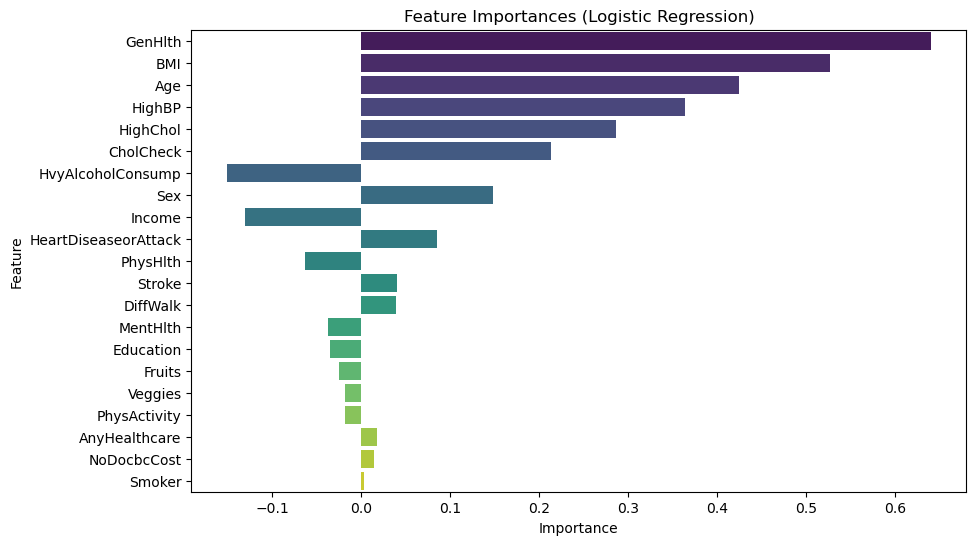

In [10]:
# Coefficients as feature importances
coefficients = lr_best.named_steps['logisticregression'].coef_[0]
features = X_train.columns
indices = np.argsort(np.abs(coefficients))[::-1]


importance_df = pd.DataFrame({
    'Feature': [features[i] for i in indices],
    'Importance': coefficients[indices]
})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importances (Logistic Regression)")
plt.show()

Accuracy: 0.7454714086152014


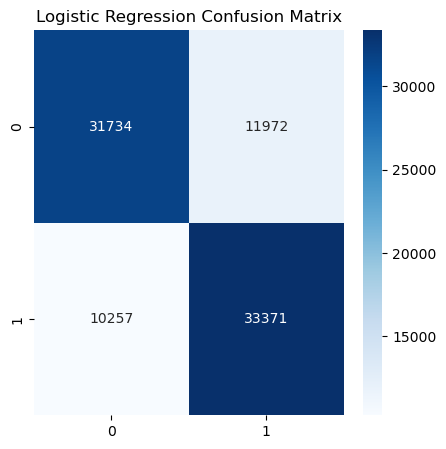

In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title(f'Logistic Regression Confusion Matrix')
plt.show()

## KNN 

In [13]:

# KNeighborsClassifier hyperparameter tuning
knn_params = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__p': [1, 2]
}

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kneighborsclassifier', KNeighborsClassifier())
])

knn_grid_search = GridSearchCV(knn_pipeline, param_grid=knn_params, cv=5, n_jobs=-1, scoring='recall')
knn_grid_search.fit(X_train, y_train)

print("Best parameters for KNeighborsClassifier:", knn_grid_search.best_params_)




Best parameters for KNeighborsClassifier: {'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__p': 2, 'kneighborsclassifier__weights': 'distance'}


In [14]:
# Cross-validation scores for KNeighborsClassifier
cv_scores = cross_val_score(knn_grid_search.best_estimator_, X_train, y_train, cv=5, scoring='recall')
print(f"Cross-validation recall scores: {cv_scores}")
print(f"Mean recall score: {np.mean(cv_scores)}")

# Evaluate the best KNeighborsClassifier model
knn_best = knn_grid_search.best_estimator_
y_pred_knn = knn_best.predict(X_test)

# Classification report for KNeighborsClassifier
print("KNeighborsClassifier Model Evaluation:")
print(classification_report(y_test, y_pred_knn))

Cross-validation recall scores: [0.98866661 0.9876363  0.98783664 0.98766527 0.98717839]
Mean recall score: 0.987796641966321
KNeighborsClassifier Model Evaluation:
              precision    recall  f1-score   support

         0.0       0.99      0.71      0.83     43706
         1.0       0.78      0.99      0.87     43628

    accuracy                           0.85     87334
   macro avg       0.88      0.85      0.85     87334
weighted avg       0.88      0.85      0.85     87334



Accuracy: 0.8532759291913802


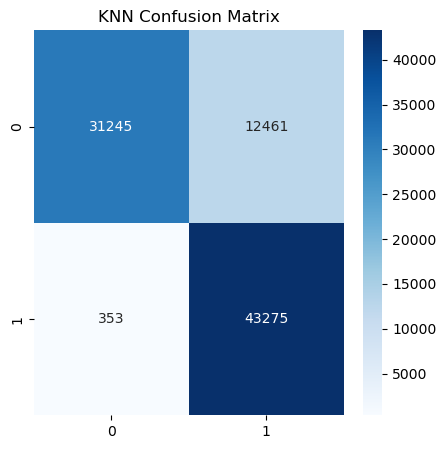

In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title(f'KNN Confusion Matrix')
plt.show()

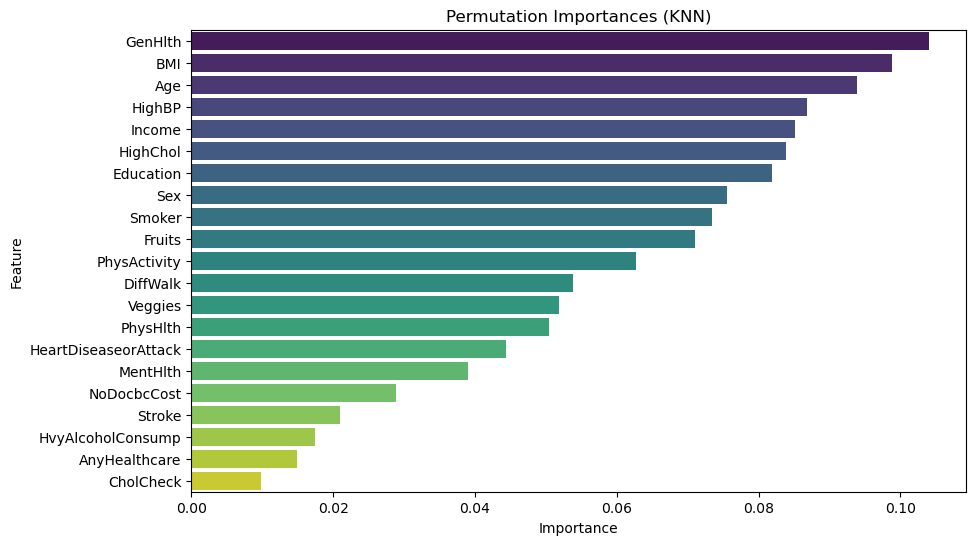

In [18]:

# Permutation importance
result = permutation_importance(knn_best, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Extract importances and sort indices
importances = result.importances_mean
indices = np.argsort(importances)[::-1]
features = X_test.columns

# Create a DataFrame for easier plotting with Seaborn
importance_df = pd.DataFrame({
    'Feature': [features[i] for i in indices],
    'Importance': importances[indices]
})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Permutation Importances (KNN)")
plt.show()

## Decision Tree

In [19]:

# DecisionTreeClassifier hyperparameter tuning
dt_params = {
    'decisiontreeclassifier__max_depth': [None, 10, 20, 30],
    'decisiontreeclassifier__min_samples_split': [2, 10, 20]
}

dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('decisiontreeclassifier', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])

#GridSearch for DecisionTree

dt_grid_search = GridSearchCV(dt_pipeline, param_grid=dt_params, cv=5, n_jobs=-1, scoring='recall')
dt_grid_search.fit(X_train, y_train)

print("Best parameters for DecisionTreeClassifier:", dt_grid_search.best_params_)

# Cross-validation scores for DecisionTreeClassifier
cv_scores = cross_val_score(dt_grid_search.best_estimator_, X_train, y_train, cv=5, scoring='recall')
print(f"Cross-validation recall scores: {cv_scores}")
print(f"Mean recall score: {np.mean(cv_scores)}")

# Evaluate the best DecisionTreeClassifier model
dt_best = dt_grid_search.best_estimator_
y_pred_dt = dt_best.predict(X_test)

# Classification report for DecisionTreeClassifier
print("DecisionTreeClassifier Model Evaluation:")
print(classification_report(y_test, y_pred_dt))



Best parameters for DecisionTreeClassifier: {'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__min_samples_split': 2}
Cross-validation recall scores: [0.98176927 0.98162617 0.98208408 0.98151222 0.9809393 ]
Mean recall score: 0.9815862081095545
DecisionTreeClassifier Model Evaluation:
              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92     43706
         1.0       0.88      0.99      0.93     43628

    accuracy                           0.92     87334
   macro avg       0.93      0.92      0.92     87334
weighted avg       0.93      0.92      0.92     87334



Accuracy: 0.9244280578010855


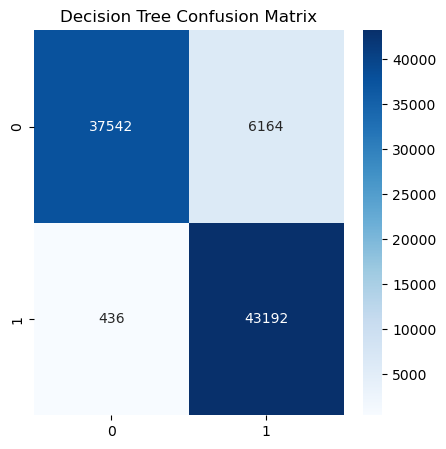

In [28]:
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title(f'Decision Tree Confusion Matrix')
plt.show()

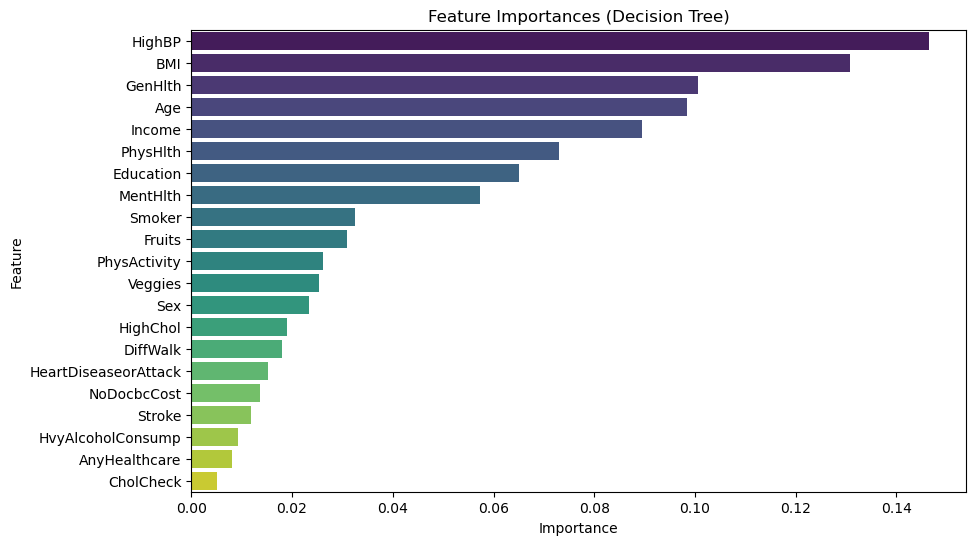

In [20]:
# Extract feature importances
importances = dt_best.named_steps['decisiontreeclassifier'].feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

# Create a DataFrame for easier plotting with Seaborn
importance_df = pd.DataFrame({
    'Feature': [features[i] for i in indices],
    'Importance': importances[indices]
})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importances (Decision Tree)")
plt.show()


## Random Forest

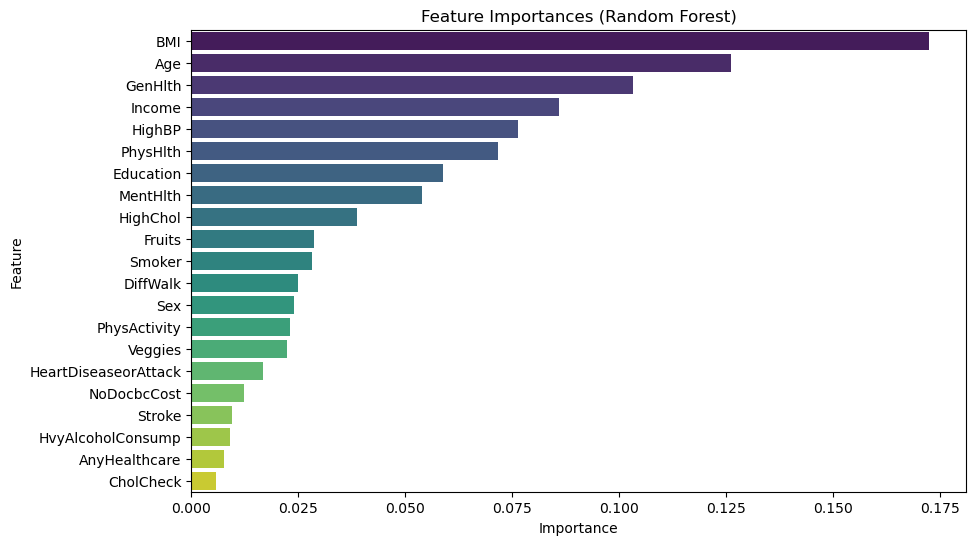

In [22]:
# Random Forest Feature Importance
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

# Plotting Random Forest feature importances using Seaborn
rf_importance_df = pd.DataFrame({
    'Feature': [features[i] for i in indices],
    'Importance': importances[indices]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df, palette='viridis')
plt.title("Feature Importances (Random Forest)")
plt.show()



In [23]:
# Further hyperparameter tuning with Gradient Boosting
gb_params = {
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__max_depth': [3, 5],
    'gradientboostingclassifier__learning_rate': [0.01, 0.1]
}

gb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gradientboostingclassifier', GradientBoostingClassifier(random_state=42))
])

gb_grid_search = GridSearchCV(gb_pipeline, param_grid=gb_params, cv=5, n_jobs=-1, scoring='recall')
gb_grid_search.fit(X_train, y_train)

print("Best parameters for Gradient Boosting:", gb_grid_search.best_params_)


Best parameters for Gradient Boosting: {'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__max_depth': 5, 'gradientboostingclassifier__n_estimators': 200}


In [24]:

# Cross-validation scores for Gradient Boosting
cv_scores = cross_val_score(gb_grid_search.best_estimator_, X_train, y_train, cv=5, scoring='recall')
print(f"Cross-validation recall scores: {cv_scores}")
print(f"Mean recall score: {np.mean(cv_scores)}")

# Evaluate the best Gradient Boosting model
gb_best = gb_grid_search.best_estimator_
y_pred_gb = gb_best.predict(X_test)

# Classification report for Gradient Boosting
print("Gradient Boosting Classifier Model Evaluation:")
print(classification_report(y_test, y_pred_gb))



Cross-validation recall scores: [0.81133911 0.80990813 0.81099568 0.80748097 0.80844853]
Mean recall score: 0.8096344839531298
Gradient Boosting Classifier Model Evaluation:
              precision    recall  f1-score   support

         0.0       0.79      0.71      0.75     43706
         1.0       0.74      0.81      0.77     43628

    accuracy                           0.76     87334
   macro avg       0.76      0.76      0.76     87334
weighted avg       0.76      0.76      0.76     87334



Accuracy: 0.7611010602972497


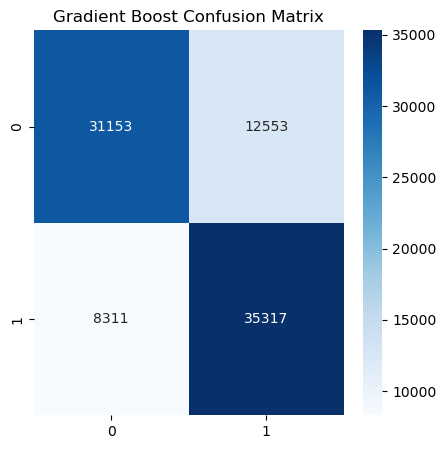

In [29]:
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Blues')
plt.title(f'Gradient Boost Confusion Matrix')
plt.show()

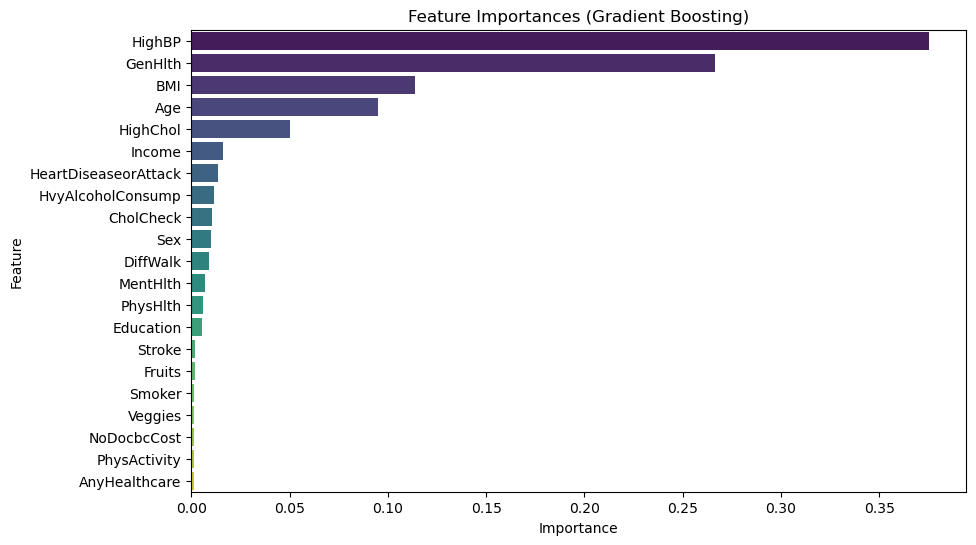

In [25]:
# Gradient Boosting Feature Importance
gb_importances = gb_best.named_steps['gradientboostingclassifier'].feature_importances_
indices = np.argsort(gb_importances)[::-1]

# Plotting Gradient Boosting feature importances using Seaborn
gb_importance_df = pd.DataFrame({
    'Feature': [features[i] for i in indices],
    'Importance': gb_importances[indices]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=gb_importance_df, palette='viridis')
plt.title("Feature Importances (Gradient Boosting)")
plt.show()